In [1]:
# point mass

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

h = 1

v1 = np.array([[1],[0]])
v2 = np.array([[-0.5],[1]])
v3 = np.array([[1],[1]])
V = np.hstack((v1,v2,v3))

A = np.array([[1,h,0,0],
              [0,1,0,0],
              [0,0,1,h],
              [0,0,0,1]])
B = np.array([[0.5*h*h,0],
              [h,0],
              [0,0.5*h*h],
              [0,h]])@V
C = np.array([[1,0,0,0],[0,0,1,0]])
D = np.zeros((2,3))
m = C.shape[0]
p = D.shape[1]

In [9]:
p

3

In [4]:
x0 = np.array([0, 0, 0, 0])
y_des = np.array([5,3,10,-1,4,1])

T = 70

G0 = D
for i in range(T):
  G0 = np.hstack((C@np.linalg.matrix_power(A,i)@B,G0))
G = G0
H = C
for i in range(T):
  dummy = np.hstack((G0[:,(i+1)*p:],np.zeros((m,(i+1)*p))))
  G = np.vstack((dummy,G))
  H = np.vstack((H,C@np.linalg.matrix_power(A,i+1)))

A_act = G[[20*m,20*m+1,40*m,40*m+1,70*m,70*m+1],:]
b_act = H[[20*m,20*m+1,40*m,40*m+1,70*m,70*m+1],:]@x0

u_hat = np.linalg.lstsq(A_act,y_des-b_act, rcond=None)[0]
y_history = G@u_hat + H@x0
traj = y_history.reshape(-1,2)

In [5]:
y_des

array([ 5,  3, 10, -1,  4,  1])

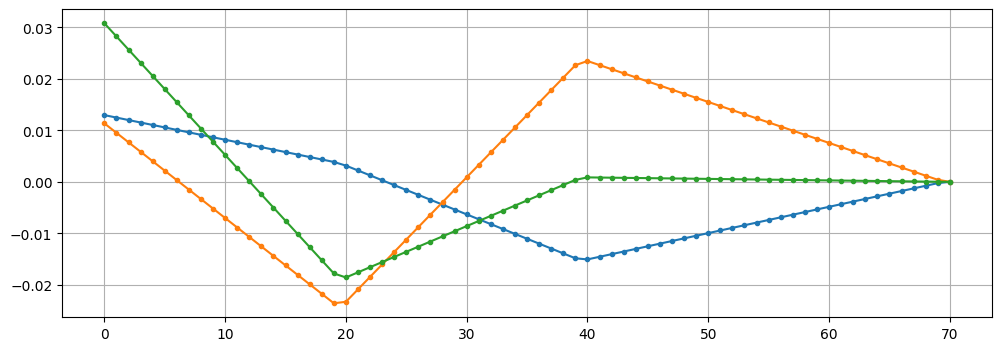

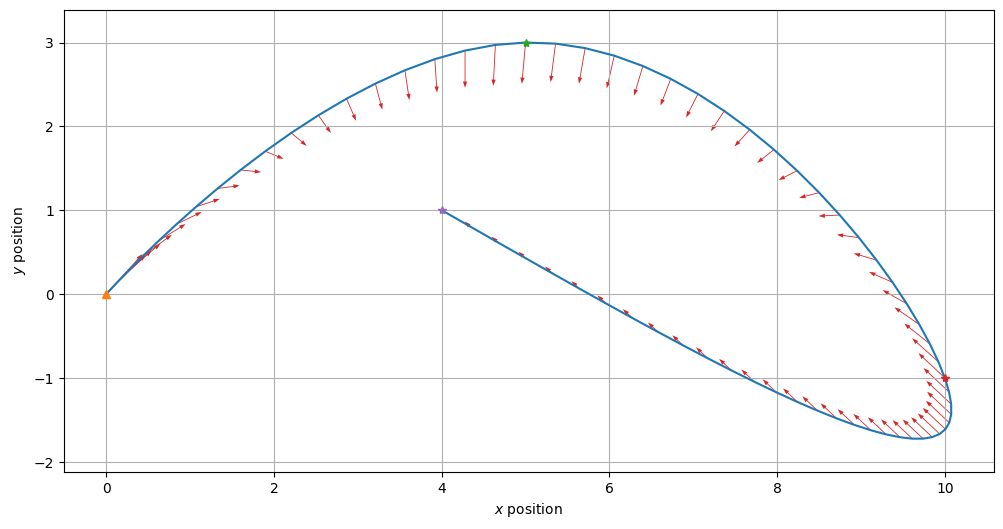

In [10]:
u_hat = u_hat.reshape(-1,3)
plt.figure(figsize=(12,4), dpi=100)
plt.plot(u_hat,'.-')
plt.grid()

plt.figure(figsize=(12,6), dpi=100)
plt.plot(traj[:,0],traj[:,1])
plt.plot(0,0,'^')
for i in range(3):
  plt.plot(y_des[2*i],y_des[2*i+1],'*')
for i in range(T):
  plt.arrow(traj[i,0], traj[i,1], 10*(V@u_hat.T)[0,i], 10*(V@u_hat.T)[1,i], head_width=0.05, width=0.01, fc='tab:red', ec='none')
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.grid()
plt.show()